In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

from sklearn.metrics import classification_report, confusion_matrix

plt.style.use('ggplot')

/Users/josetorronteras/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
df = pd.read_csv("dataset/iris.data")

In [3]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Text(0.5,0.98,'Relacion entre Sepal Width y Sepal Length')

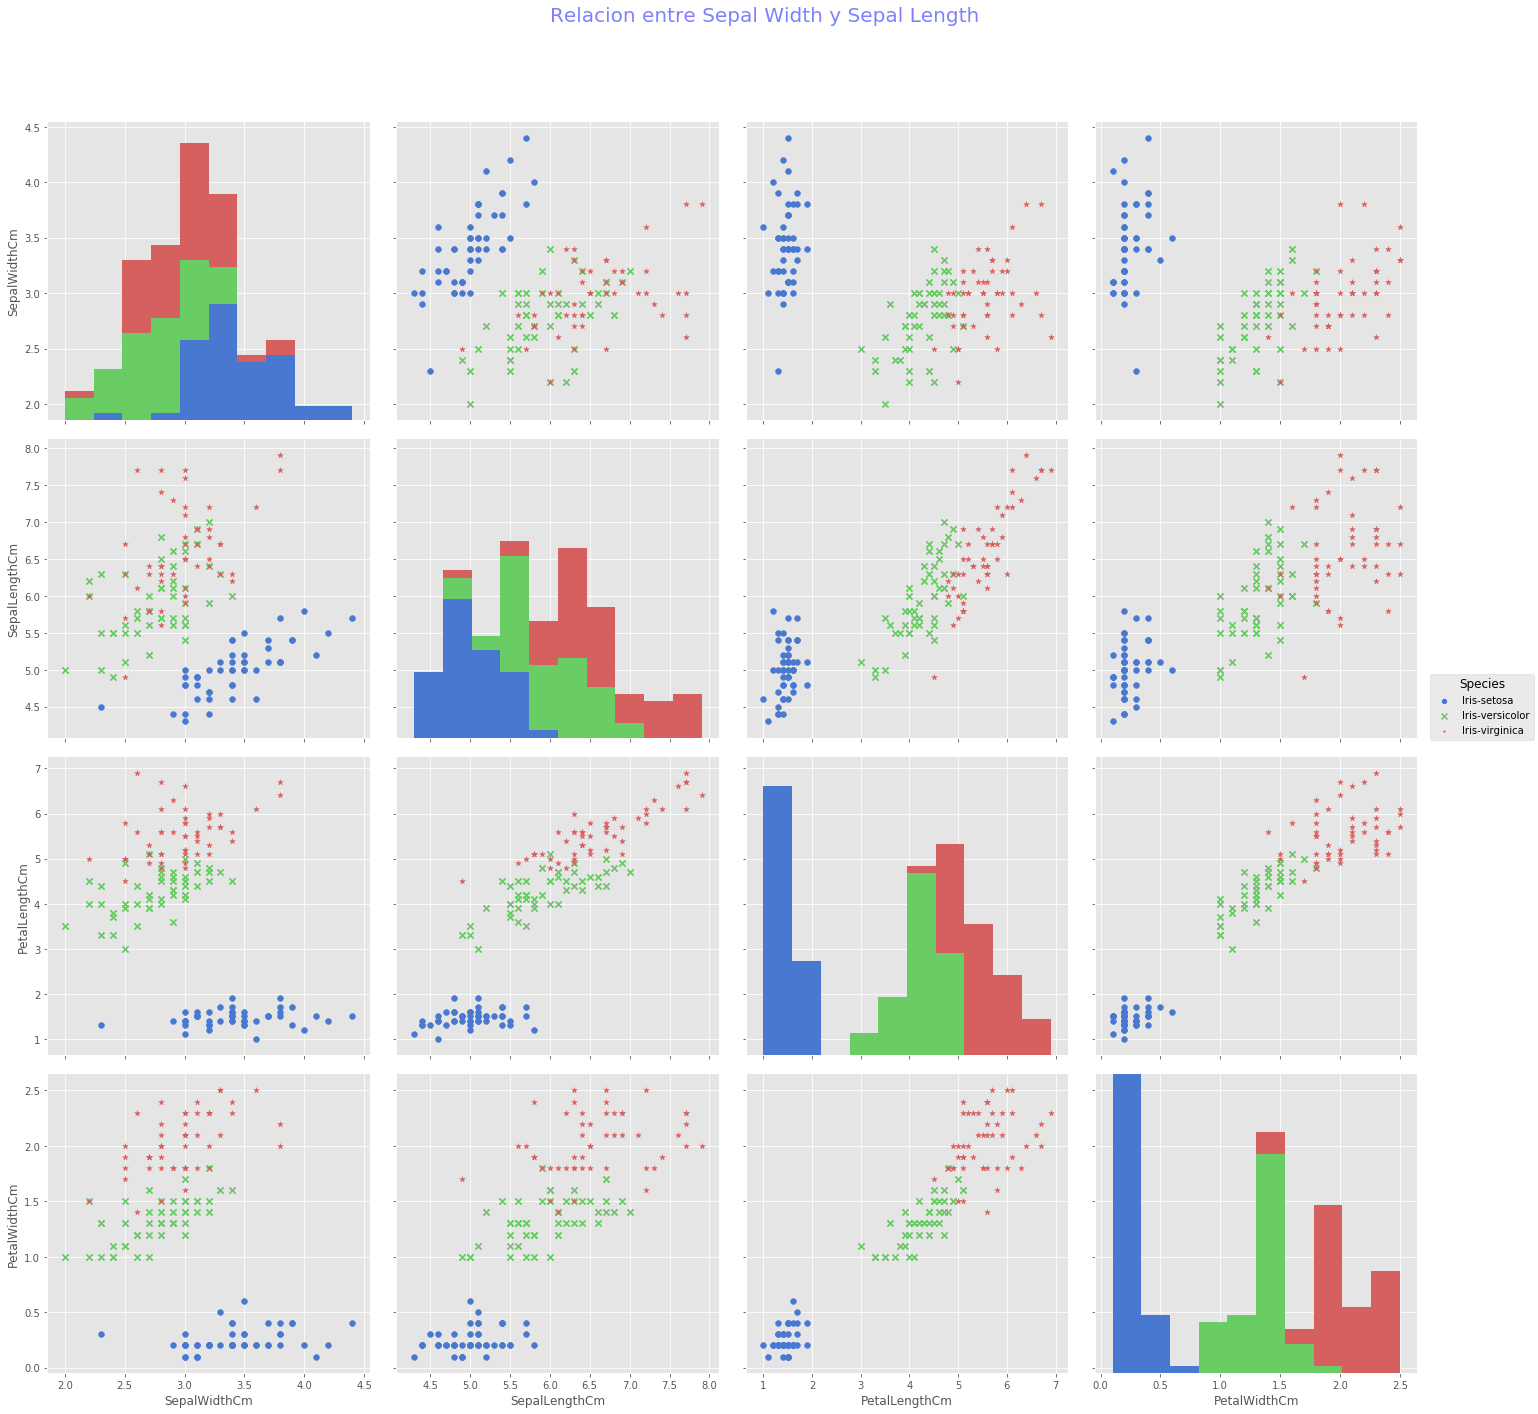

In [5]:
a = sns.pairplot(df, hue = 'Species', palette = "muted", size = 5,\
                 vars = ['SepalWidthCm', 'SepalLengthCm', 'PetalLengthCm', 'PetalWidthCm'],\
                 kind = 'scatter', markers = ['o','x','*'])

#Cambiar el tamaño de los puntos scatters
a = a.map_offdiag(plt.scatter, s = 35, alpha = 0.9)

#Eliminar las lineas Arriba y Derecha
sns.despine()

#additional line to adjust some appearance issues
plt.subplots_adjust(top = 0.9)

#Añadir titulo
a.fig.suptitle('Relacion entre Sepal Width y Sepal Length', fontsize = 20, color = 'b', alpha = 0.5)

In [6]:
datos_x = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
datos_y = df['Species']
df_sin_escalar = datos_x

Escalamos los datos <br>
`Calculate μ & σ(fit) and apply the transformation(transform)
Center test data with the μ & σ computed (fitted) on training data`

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [8]:
datos_x_escalado = scaler.fit_transform(datos_x.values)
df_escalado = pd.DataFrame(datos_x_escalado, index = datos_x.index, columns = datos_x.columns)

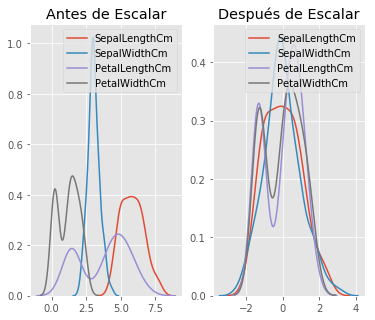

In [9]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title('Antes de Escalar')
sns.kdeplot(df_sin_escalar['SepalLengthCm'], ax=ax1)
sns.kdeplot(df_sin_escalar['SepalWidthCm'], ax=ax1)
sns.kdeplot(df_sin_escalar['PetalLengthCm'], ax=ax1)
sns.kdeplot(df_sin_escalar['PetalWidthCm'], ax=ax1)

ax2.set_title('Después de Escalar')
sns.kdeplot(df_escalado['SepalLengthCm'], ax=ax2)
sns.kdeplot(df_escalado['SepalWidthCm'], ax=ax2)
sns.kdeplot(df_escalado['PetalLengthCm'], ax=ax2)
sns.kdeplot(df_escalado['PetalWidthCm'], ax=ax2)

plt.show()

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_escalado.values, datos_y, test_size = 0.2, random_state=42)

In [11]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [12]:
y_train = keras.utils.to_categorical(y_train, num_classes = 3)
y_test = keras.utils.to_categorical(y_test, num_classes = 3)

In [13]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120, 3)
(30, 3)


In [14]:
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=4))
model.add(Dense(3, activation='softmax'))
sgd = SGD(lr = 0.01, decay = 1e-6, momentum = 0.9, nesterov=True)
model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
history = model.fit(X_train, y_train, epochs = 300, batch_size = 32)

Epoch 1/300
120/120 [==============================] - 0s 2ms/step - loss: 0.9880 - acc: 0.5083
Epoch 2/300
120/120 [==============================] - 0s 72us/step - loss: 0.8541 - acc: 0.6833
Epoch 3/300
120/120 [==============================] - 0s 63us/step - loss: 0.7193 - acc: 0.7833
Epoch 4/300
120/120 [==============================] - 0s 170us/step - loss: 0.6106 - acc: 0.8250
Epoch 5/300
120/120 [==============================] - 0s 100us/step - loss: 0.5329 - acc: 0.8250
Epoch 6/300
120/120 [==============================] - 0s 197us/step - loss: 0.4760 - acc: 0.8333
Epoch 7/300
120/120 [==============================] - 0s 103us/step - loss: 0.4359 - acc: 0.8333
Epoch 8/300
120/120 [==============================] - 0s 139us/step - loss: 0.4052 - acc: 0.8417
Epoch 9/300
120/120 [==============================] - 0s 65us/step - loss: 0.3816 - acc: 0.8500
Epoch 10/300
120/120 [==============================] - 0s 63us/step - loss: 0.3614 - acc: 0.8417
Epoch 11/300
120/120 [===

120/120 [==============================] - 0s 83us/step - loss: 0.0877 - acc: 0.9583
Epoch 85/300
120/120 [==============================] - 0s 73us/step - loss: 0.0871 - acc: 0.9583
Epoch 86/300
120/120 [==============================] - 0s 56us/step - loss: 0.0864 - acc: 0.9583
Epoch 87/300
120/120 [==============================] - 0s 60us/step - loss: 0.0854 - acc: 0.9583
Epoch 88/300
120/120 [==============================] - 0s 59us/step - loss: 0.0847 - acc: 0.9583
Epoch 89/300
120/120 [==============================] - 0s 95us/step - loss: 0.0842 - acc: 0.9583
Epoch 90/300
120/120 [==============================] - 0s 71us/step - loss: 0.0837 - acc: 0.9583
Epoch 91/300
120/120 [==============================] - 0s 66us/step - loss: 0.0842 - acc: 0.9583
Epoch 92/300
120/120 [==============================] - 0s 75us/step - loss: 0.0823 - acc: 0.9667
Epoch 93/300
120/120 [==============================] - 0s 90us/step - loss: 0.0821 - acc: 0.9583
Epoch 94/300
120/120 [===========

Epoch 167/300
120/120 [==============================] - 0s 66us/step - loss: 0.0606 - acc: 0.9833
Epoch 168/300
120/120 [==============================] - 0s 125us/step - loss: 0.0604 - acc: 0.9833
Epoch 169/300
120/120 [==============================] - 0s 68us/step - loss: 0.0604 - acc: 0.9750
Epoch 170/300
120/120 [==============================] - 0s 104us/step - loss: 0.0600 - acc: 0.9750
Epoch 171/300
120/120 [==============================] - 0s 71us/step - loss: 0.0600 - acc: 0.9750
Epoch 172/300
120/120 [==============================] - 0s 72us/step - loss: 0.0599 - acc: 0.9750
Epoch 173/300
120/120 [==============================] - 0s 63us/step - loss: 0.0597 - acc: 0.9750
Epoch 174/300
120/120 [==============================] - 0s 73us/step - loss: 0.0598 - acc: 0.9750
Epoch 175/300
120/120 [==============================] - 0s 82us/step - loss: 0.0597 - acc: 0.9750
Epoch 176/300
120/120 [==============================] - 0s 82us/step - loss: 0.0596 - acc: 0.9833
Epoch 17

120/120 [==============================] - 0s 81us/step - loss: 0.0526 - acc: 0.9833
Epoch 250/300
120/120 [==============================] - 0s 86us/step - loss: 0.0531 - acc: 0.9833
Epoch 251/300
120/120 [==============================] - 0s 86us/step - loss: 0.0524 - acc: 0.9833
Epoch 252/300
120/120 [==============================] - 0s 66us/step - loss: 0.0525 - acc: 0.9833
Epoch 253/300
120/120 [==============================] - 0s 80us/step - loss: 0.0532 - acc: 0.9833
Epoch 254/300
120/120 [==============================] - 0s 99us/step - loss: 0.0527 - acc: 0.9833
Epoch 255/300
120/120 [==============================] - 0s 132us/step - loss: 0.0522 - acc: 0.9833
Epoch 256/300
120/120 [==============================] - 0s 75us/step - loss: 0.0527 - acc: 0.9833
Epoch 257/300
120/120 [==============================] - 0s 135us/step - loss: 0.0522 - acc: 0.9833
Epoch 258/300
120/120 [==============================] - 0s 86us/step - loss: 0.0525 - acc: 0.9833
Epoch 259/300
120/120 

In [16]:
score = model.evaluate(X_test, y_test, verbose = 0)

In [17]:
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.028766989707946777
Test accuracy: 1.0


In [18]:
y_pred = model.predict(X_test)

In [19]:
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

print(classification_report(y_test_class, y_pred_class))
print(confusion_matrix(y_test_class, y_pred_class))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        10
          1       1.00      1.00      1.00         9
          2       1.00      1.00      1.00        11

avg / total       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [20]:
df_resultados = pd.DataFrame.from_dict(history.history)

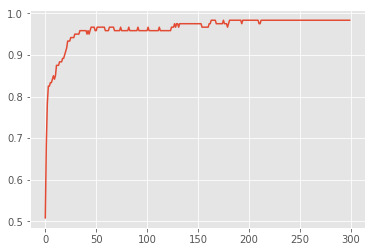

In [21]:
df_resultados['acc'].plot()

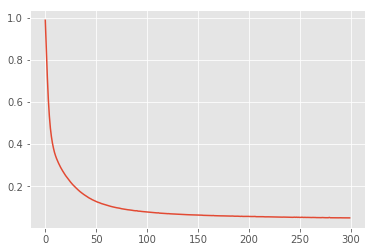

In [22]:
df_resultados['loss'].plot()